Analyse des Profils Climatiques Européens - Arokeum Noé

On télécharge les données, on les importe depuis le CSV, puis on les convertit en matrices pour pouvoir les analyser.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


#On utilise ici read_csv pour importer les valeurs // On utilise la bibliotheque numpy pour ouvrir le fichier 
df = pd.read_csv('../data/temperat.csv', sep = ';')
matrice = df.to_numpy()
print(matrice)

[['Amsterdam' 2.9 2.5 5.7 8.2 12.5 14.8 17.1 17.1 14.5 11.4 7.0 4.4 9.9
  14.6 52.2 4.5 'Ouest']
 ['Athenes' 9.1 9.7 11.7 15.4 20.1 24.5 27.4 27.2 23.8 19.2 14.6 11.0
  17.8 18.3 37.6 23.5 'Sud']
 ['Berlin' -0.2 0.1 4.4 8.2 13.8 16.0 18.3 18.0 14.4 10.0 4.2 1.2 9.1
  18.5 52.3 13.2 'Ouest']
 ['Bruxelles' 3.3 3.3 6.7 8.9 12.8 15.6 17.8 17.8 15.0 11.1 6.7 4.4 10.3
  14.4 50.5 4.2 'Ouest']
 ['Budapest' -1.1 0.8 5.5 11.6 17.0 20.2 22.0 21.3 16.9 11.3 5.1 0.7 10.9
  23.1 47.3 19.0 'Est']
 ['Copenhague' -0.4 -0.4 1.3 5.8 11.1 15.4 17.1 16.6 13.3 8.8 4.1 1.3 7.8
  17.5 55.4 12.3 'Nord']
 ['Dublin' 4.8 5.0 5.9 7.8 10.4 13.3 15.0 14.6 12.7 9.7 6.7 5.4 9.3 10.2
  53.2 6.1 'Nord']
 ['Helsinki' -5.8 -6.2 -2.7 3.1 10.2 14.0 17.2 14.9 9.7 5.2 0.1 -2.3 4.8
  23.4 60.1 25.0 'Nord']
 ['Kiev' -5.9 -5.0 -0.3 7.4 14.3 17.8 19.4 18.5 13.7 7.5 1.2 -3.6 7.1
  25.3 50.3 30.3 'Est']
 ['Cracovie' -3.7 -2.0 1.9 7.9 13.2 16.9 18.4 17.6 13.7 8.6 2.6 -1.7 7.7
  22.1 50.0 19.6 'Est']
 ['Lisbonne' 10.5 11.3 12.8 14.5

On affiche le nom des villes sur un graphique en fonction de la latitude et la longitude 

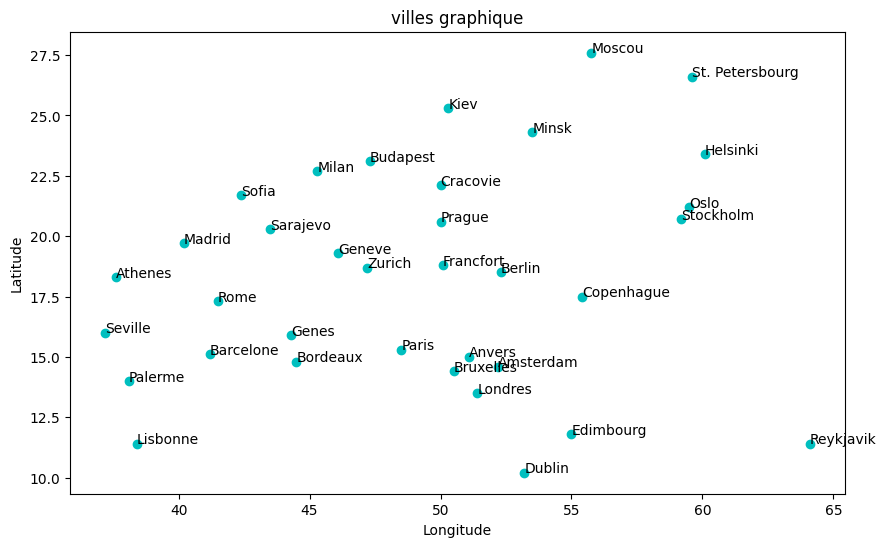

In [140]:
villes = df.iloc[:, 0]  #nom des villes 
latitudes = df.iloc[:, 14]  # latitude 
longitudes = df.iloc[:, 15]  # longitude 

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, color='c', marker='o')  

# On ajoute le nom des villes apres avoir fait les points de latitude/longitude
for i, ville in enumerate(villes):
    plt.text(longitudes[i], latitudes[i], ville)


plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("villes graphique")
plt.show()


On supprime de la matrices toutes les infos qui ne sont pas associées à la temperature mensuelle afin de ne conserver que les variables  pertinentes pour l’analyse et l’ACP.

In [141]:
# Suppression de la colonne 0 (nom de la ville)
matrice_sans_nom = matrice[:, 1:]  

# Sélection des 12 premières colonnes après le nom
mmatrice = matrice_sans_nom[:, :12]
print(mmatrice)

[[2.9 2.5 5.7 8.2 12.5 14.8 17.1 17.1 14.5 11.4 7.0 4.4]
 [9.1 9.7 11.7 15.4 20.1 24.5 27.4 27.2 23.8 19.2 14.6 11.0]
 [-0.2 0.1 4.4 8.2 13.8 16.0 18.3 18.0 14.4 10.0 4.2 1.2]
 [3.3 3.3 6.7 8.9 12.8 15.6 17.8 17.8 15.0 11.1 6.7 4.4]
 [-1.1 0.8 5.5 11.6 17.0 20.2 22.0 21.3 16.9 11.3 5.1 0.7]
 [-0.4 -0.4 1.3 5.8 11.1 15.4 17.1 16.6 13.3 8.8 4.1 1.3]
 [4.8 5.0 5.9 7.8 10.4 13.3 15.0 14.6 12.7 9.7 6.7 5.4]
 [-5.8 -6.2 -2.7 3.1 10.2 14.0 17.2 14.9 9.7 5.2 0.1 -2.3]
 [-5.9 -5.0 -0.3 7.4 14.3 17.8 19.4 18.5 13.7 7.5 1.2 -3.6]
 [-3.7 -2.0 1.9 7.9 13.2 16.9 18.4 17.6 13.7 8.6 2.6 -1.7]
 [10.5 11.3 12.8 14.5 16.7 19.4 21.5 21.9 20.4 17.4 13.7 11.1]
 [3.4 4.2 5.5 8.3 11.9 15.1 16.9 16.5 14.0 10.2 6.3 4.4]
 [5.0 6.6 9.4 12.2 16.0 20.8 24.7 24.3 19.8 13.9 8.7 5.4]
 [-6.9 -6.2 -1.9 5.4 12.4 15.9 17.4 16.3 11.6 5.8 0.1 -4.2]
 [-9.3 -7.6 -2.0 6.0 13.0 16.6 18.3 16.7 11.2 5.1 -1.1 -6.0]
 [-4.3 -3.8 -0.6 4.4 10.3 14.9 16.9 15.4 11.1 5.7 0.5 -2.9]
 [3.7 3.7 7.3 9.7 13.7 16.5 19.0 18.7 16.1 12.5 7.3 5.2]


On affiche la matrice de correlations des variables, on transpose la matrice de donnees et 
affichez les correlations à nouveau

In [142]:
df = pd.DataFrame(mmatrice)

# On utilise le .corr de la bibliotheque pour determiner la matrice de corrélation 
correlation_mmatrice = df.corr()
print("Matrice de corrélation :")
print(correlation_mmatrice)


Matrice de corrélation :
          0         1         2         3         4         5         6   \
0   1.000000  0.990001  0.955844  0.831300  0.635780  0.565348  0.573917   
1   0.990001  1.000000  0.979253  0.880420  0.692374  0.623886  0.623093   
2   0.955844  0.979253  1.000000  0.945430  0.795911  0.720413  0.716400   
3   0.831300  0.880420  0.945430  1.000000  0.943402  0.888344  0.862399   
4   0.635780  0.692374  0.795911  0.943402  1.000000  0.973487  0.941597   
5   0.565348  0.623886  0.720413  0.888344  0.973487  1.000000  0.983711   
6   0.573917  0.623093  0.716400  0.862399  0.941597  0.983711  1.000000   
7   0.644986  0.691115  0.779523  0.895226  0.938789  0.964775  0.986772   
8   0.814065  0.850174  0.910234  0.968357  0.940246  0.928095  0.931957   
9   0.911908  0.929664  0.964201  0.962006  0.876671  0.833464  0.837789   
10  0.967044  0.972954  0.973382  0.922261  0.789824  0.736768  0.738564   
11  0.994137  0.982678  0.956523  0.851011  0.676723  0.608702 

In [143]:
# On fait pareil pour la matrice transposée 
matrice_transposee = df.T
correlation_matrix_transposee = matrice_transposee.corr()
print(correlation_matrix_transposee)

          0         1         2         3         4         5         6   \
0   1.000000  0.995806  0.992252  0.996897  0.979526  0.993880  0.989739   
1   0.995806  1.000000  0.984794  0.993847  0.972531  0.996491  0.996314   
2   0.992252  0.984794  1.000000  0.995795  0.995923  0.989048  0.982441   
3   0.996897  0.993847  0.995795  1.000000  0.986556  0.992742  0.992745   
4   0.979526  0.972531  0.995923  0.986556  1.000000  0.979613  0.970280   
5   0.993880  0.996491  0.989048  0.992742  0.979613  1.000000  0.994781   
6   0.989739  0.996314  0.982441  0.992745  0.970280  0.994781  1.000000   
7   0.986993  0.985161  0.989064  0.986354  0.983017  0.993311  0.982852   
8   0.983101  0.976628  0.996051  0.986666  0.998010  0.985823  0.972901   
9   0.985266  0.980095  0.997062  0.989807  0.998991  0.986561  0.976821   
10  0.988923  0.992285  0.975248  0.988588  0.961286  0.981471  0.988605   
11  0.992206  0.995673  0.991455  0.996158  0.983704  0.996742  0.997724   
12  0.982844

Avant la transposition, on étudie les relations entre les mois. On se rettouve avec une matrice 12x12.

Après la transposition, on étudie les relations entre les villes. On se rettouve avec une matrice 35x35

On realise la matrice centrée reduite avant de lancer l'ACP ...

In [144]:
#on determine la matrice centrée avec la moyenne 
moyenne = np.mean(mmatrice, axis=0)
matrice_centree = mmatrice - moyenne
print(matrice_centree)

[[1.5542857142857143 0.2828571428571429 0.47142857142857064
  -1.0828571428571454 -1.4114285714285693 -2.614285714285714
  -2.522857142857138 -1.879999999999999 -1.1314285714285681
  0.3971428571428586 0.9342857142857133 1.5200000000000005]
 [7.7542857142857144 7.482857142857142 6.47142857142857 6.117142857142856
  6.188571428571432 7.085714285714285 7.777142857142859 8.219999999999999
  8.168571428571433 8.197142857142858 8.534285714285712 8.120000000000001]
 [-1.5457142857142856 -2.117142857142857 -0.8285714285714292
  -1.0828571428571454 -0.11142857142856855 -1.4142857142857146
  -1.3228571428571385 -0.9800000000000004 -1.2314285714285678
  -1.0028571428571418 -1.8657142857142865 -1.68]
 [1.9542857142857142 1.0828571428571427 1.4714285714285706
  -0.38285714285714434 -1.1114285714285685 -1.814285714285715
  -1.8228571428571385 -1.1799999999999997 -0.6314285714285681
  0.09714285714285786 0.6342857142857135 1.5200000000000005]
 [-2.4457142857142857 -1.417142857142857 0.27142857142857

In [145]:
#on fait l'cart type pour ensuite determine la matrice reduite

mmatrice = mmatrice.astype(np.float64)
ecart_type = np.std(mmatrice, axis=0)
matrice_reduite = matrice_centree / ecart_type

print("Matrice réduite :")
print(matrice_reduite)

Matrice réduite :
[[0.28661072949491506 0.05218929630521452 0.09835639600082943
  -0.28863227057091695 -0.4374518973169082 -0.7988661851364273
  -0.7160624921165389 -0.5116625277187925 -0.2793242292428571
  0.09320374207304429 0.20756796990432944 0.3104616905006623]
 [1.4298924997227933 1.3806441113470382 1.3501650723750243
  1.6305057817739619 1.9180583190049092 2.1652329389490053
  2.207386300726187 2.2371627541747214 2.016636291427604
  1.9237520576083678 1.8960413642331269 1.6585190308324853]
 [-0.285030155619024 -0.39062897537539343 -0.1728688172135794
  -0.28863227057091695 -0.034535676103965594 -0.43217350999183785
  -0.375466516251367 -0.26671770061937083 -0.30401197677694797
  -0.2353562119973985 -0.4145011753747013 -0.34314186844810035]
 [0.3603708437031653 0.19979538686541715 0.3069911753965286
  -0.10204940437072012 -0.344471230883152 -0.5544044017067011
  -0.5173815061951887 -0.3211498844192422 -0.1558854915724022
  0.022798037629377828 0.14091770433871903 0.31046169050066

On Recode l'ACP en extrayant valeurs propres et vecteur propre de la matrice

In [146]:
# Sélection des 23 premières capitales
matrice_reduite = matrice_reduite.astype(np.float64)
mmatrite_capitales = matrice_reduite[:23, :]

# corrélation
matrice_corr = np.corrcoef(mmatrite_capitales, rowvar=False)
valeurs_propres, vecteurs_propres = np.linalg.eig(matrice_corr)
print(valeurs_propres)
print(vecteurs_propres)


[9.94775042e+00 1.84764850e+00 1.26255804e-01 3.82934463e-02
 1.67094089e-02 1.28330357e-02 5.83029308e-03 2.03189293e-03
 1.34191736e-04 5.36783394e-04 1.02345163e-03 9.52770739e-04]
[[ 2.67104990e-01 -3.90910407e-01 -1.90718734e-01 -5.97318841e-02
   2.44610358e-01  1.61281259e-01  5.22236801e-01 -8.43008739e-02
   3.80167641e-02  4.69151450e-01  3.55490960e-01  1.49320057e-01]
 [ 2.80368827e-01 -3.35347914e-01  9.75521900e-03 -4.27798846e-01
   3.37481522e-01 -2.54841555e-01 -1.86130657e-02  2.30288255e-01
   1.07851172e-02 -2.63615863e-02 -4.75658899e-01 -4.08103318e-01]
 [ 2.99635542e-01 -2.11370954e-01  3.39956959e-01 -3.97667051e-01
  -3.35104704e-01  3.26105760e-01 -3.95188132e-02 -2.84252270e-01
  -7.01374439e-02 -1.61243879e-01 -2.37833762e-01  4.50939108e-01]
 [ 3.08778025e-01  7.32482073e-02  5.57957383e-01 -1.27078736e-01
   1.28243495e-01 -1.36857174e-01 -3.70812747e-01  6.15518340e-03
   1.21976043e-01  9.13824993e-02  5.87109179e-01 -1.76587149e-01]
 [ 2.75792696e-01  3

Ici on remarque que les deux premieres valeurs propres sont tres hautes : environ 9,95 et 1,84, contrairement au reste des valeurs propres qui sont très petites ,cela suggere que les deux premiers axes captent la majorités de l'information et le reste des axes peuvent être negligé.

On peut alors utiliser les deux axes principaux pour calculer les coordonnées de chaque ville en 2D...

In [147]:
# On trie les valeurs propres eparn ordre décroissant
indices = np.argsort(valeurs_propres)[::-1]
valeurs_propres = valeurs_propres[indices]
vecteurs_propres = vecteurs_propres[:, indices]

#ACP 2 axes 
vecteurs_principaux = vecteurs_propres[:, :2]
coordonnees_2D = np.dot(mmatrite_capitales, vecteurs_principaux)
print("Coordonnées des villes en 2D : ", coordonnees_2D)


Coordonnées des villes en 2D :  [[-0.54869885 -1.24790815]
 [ 6.2805054   0.9399687 ]
 [-1.01681616  0.04161993]
 [-0.17284202 -1.06416818]
 [ 0.79717527  1.63172989]
 [-2.09855154 -0.43398609]
 [-1.2303808  -2.46537183]
 [-4.46783541  0.44401656]
 [-2.32131755  1.88980367]
 [-1.90983966  0.8372128 ]
 [ 4.41066512 -1.39172606]
 [-0.70381363 -1.4369242 ]
 [ 3.01712709  0.7082846 ]
 [-3.73279482  1.30828152]
 [-3.93752764  2.04408551]
 [-3.79606699  0.30449055]
 [ 0.55591725 -0.79966671]
 [-0.84706613  0.67810974]
 [-5.10702286 -2.74981101]
 [ 4.22552327  0.33341373]
 [-0.60031086  0.32758322]
 [-0.36209799  0.77246179]
 [-3.64803533  0.02588335]]


Affichage

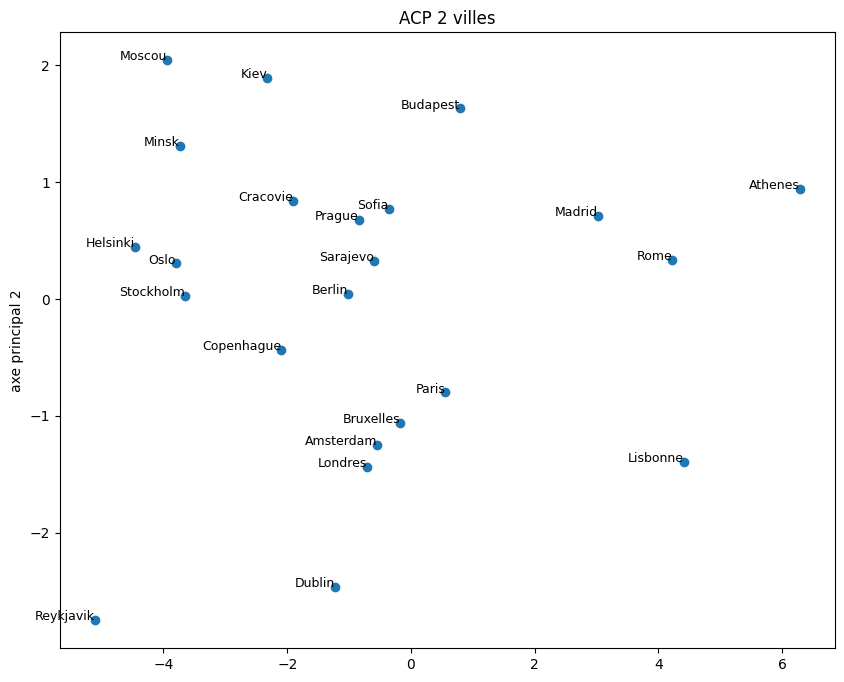

In [148]:
noms_villes = matrice[:23, 0]
plt.figure(figsize=(10, 8))

plt.scatter(coordonnees_2D[:, 0], coordonnees_2D[:, 1])
for i, nom in enumerate(noms_villes):
    plt.text(coordonnees_2D[i, 0], coordonnees_2D[i, 1], nom, fontsize=9, ha='right')

plt.ylabel('axe principal 2')
plt.title('ACP 2 villes')
plt.show()


On effectue une ACP sur la matrice transposée des données pour visualiser non pas les villes mais les mois sur un plan 

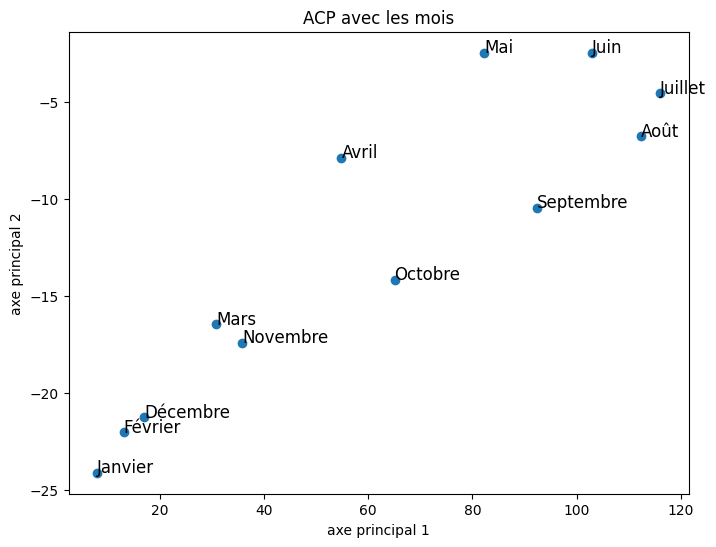

In [ ]:
mmatrite_transposee = mmatrice.T 
matrice_corr = np.corrcoef(mmatrite_transposee, rowvar=False)

# ACP sur les mois avec deux axes 
valeurs_propres, vecteurs_propres = np.linalg.eigh(matrice_corr)
indices = np.argsort(valeurs_propres)[::-1]
valeurs_propres = valeurs_propres[indices]
vecteurs_propres = vecteurs_propres[:, indices]

# On fait comme pour la derniere etape : on selectionne les 2 premiers axes principaux
vecteurs_principaux = vecteurs_propres[:, :2]
coordonnees_2D = np.dot(matrice_transposee, vecteurs_principaux)

# affichage 
mois = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]
plt.figure(figsize=(8, 6))
plt.scatter(coordonnees_2D[:, 0], coordonnees_2D[:, 1])
for i, mois_name in enumerate(mois):
    plt.text(coordonnees_2D[i, 0], coordonnees_2D[i, 1], mois_name, fontsize=12)

plt.title("ACP avec les mois")
plt.xlabel("axe principal 1")
plt.ylabel("axe principal 2")
plt.show()



Ici on remarque que les résultats de l'ACP par rapport aux mois montrent un regroupement entre des mois d'hivert (Janvier, Fervrier,Décembre) et des mois d'été (Mai, Juin, Juillet, Aout). Cela nous indique les temperatures dans une même saison sont relativement les mêmes. L'acp dans la matrice inversé fonctionne selon moi assez bien. 